In [18]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
brupt = pd.read_csv("/content/drive/MyDrive/Cases/Bankruptcy/Bankruptcy.csv", index_col=0)
X = brupt.drop(['D', 'YR'], axis=1)
y = brupt['D']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    train_size=0.7,
                                                    random_state=2022)

In [ ]:
X.shape

(132, 24)

In [21]:
mm = MinMaxScaler()
X_trn_scl = mm.fit_transform(X_train)
X_tst_scl = mm.transform(X_test)

#### Model Definition

In [ ]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu',input_shape=(24,)), 
    tf.keras.layers.Dense(10, activation='relu'), 
    tf.keras.layers.Dense(5, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                500       
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy())

In [ ]:
history = model.fit(X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 62ms/step - loss: 0.6917 - val_loss: 0.6863
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6917 - val_loss: 0.6862
Epoch 3/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6916 - val_loss: 0.6861
Epoch 4/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6914 - val_loss: 0.6860
Epoch 5/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6913 - val_loss: 0.6859
Epoch 6/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6911 - val_loss: 0.6858
Epoch 7/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6910 - val_loss: 0.6857
Epoch 8/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6909 - val_loss: 0.6855
Epoch 9/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.6909 - val_loss: 0.6854
Epoch 10/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6908 - val_loss: 0.6853
Epoch 11/

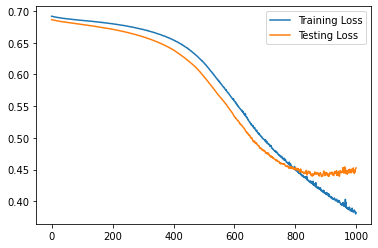

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='best')
plt.show()

#### Early Stopping

In [ ]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu',input_shape=(24,)), 
    tf.keras.layers.Dense(10, activation='relu'), 
    tf.keras.layers.Dense(5, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.compile(optimizer='RMSprop', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping( monitor='val_loss',min_delta=0.0001, patience=15,verbose=3,restore_best_weights=True)
history = model.fit(X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=1000,
                    callbacks=[early])

Let us see the parameters in the early stopping involved:
- **monitor**: quantity to be monitored.<br>
- **min_delta**: minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.<br>
- **patience**: number of epochs with no improvement after which training will be stopped.<br>
- **restore_best_weights**: whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

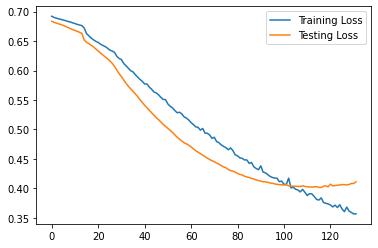

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='best')
plt.show()

#### L1 Regularizer

In [ ]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu',input_shape=(24,),
                          kernel_regularizer=tf.keras.regularizers.L1()), 
    tf.keras.layers.Dense(10, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L1()), 
    tf.keras.layers.Dense(5, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L1()), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.compile(optimizer='RMSprop', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=1000)

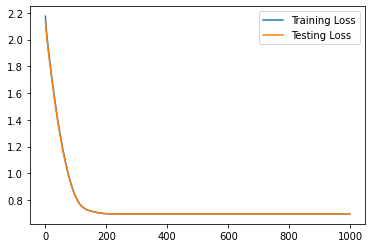

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='best')
plt.show()

#### L2 Regularizer

In [ ]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu',input_shape=(24,),
                          kernel_regularizer=tf.keras.regularizers.L2()), 
    tf.keras.layers.Dense(10, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L2()), 
    tf.keras.layers.Dense(5, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L2()), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.compile(optimizer='RMSprop', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 82ms/step - loss: 1.1119 - accuracy: 0.5000 - val_loss: 1.0926 - val_accuracy: 0.5000
Epoch 2/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0941 - accuracy: 0.5000 - val_loss: 1.0798 - val_accuracy: 0.5000
Epoch 3/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.0820 - accuracy: 0.5000 - val_loss: 1.0693 - val_accuracy: 0.5000
Epoch 4/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.0716 - accuracy: 0.5000 - val_loss: 1.0600 - val_accuracy: 0.5000
Epoch 5/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.0625 - accuracy: 0.5000 - val_loss: 1.0513 - val_accuracy: 0.5000
Epoch 6/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.0537 - accuracy: 0.5000 - val_loss: 1.0431 - val_accuracy: 0.5000
Epoch 7/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.0454 - accuracy: 0.5109 - val_loss: 1.0351 - val_accuracy: 0.5000
Epoch 8/1000


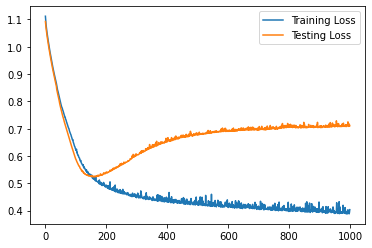

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='best')
plt.show()

#### L1L2 Regularizer

In [22]:
tf.random.set_seed(2022)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu',input_shape=(24,),
                          kernel_regularizer=tf.keras.regularizers.L1L2()), 
    tf.keras.layers.Dense(10, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L1L2()), 
    tf.keras.layers.Dense(5, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.L1L2()), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.compile(optimizer='RMSprop', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
history = model.fit(X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 82ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6836 - val_accuracy: 0.5000
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6902 - accuracy: 0.5000 - val_loss: 0.6819 - val_accuracy: 0.5000
Epoch 3/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6890 - accuracy: 0.5000 - val_loss: 0.6805 - val_accuracy: 0.5000
Epoch 4/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6877 - accuracy: 0.5000 - val_loss: 0.6794 - val_accuracy: 0.5000
Epoch 5/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.6869 - accuracy: 0.5000 - val_loss: 0.6781 - val_accuracy: 0.5000
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6857 - accuracy: 0.5000 - val_loss: 0.6766 - val_accuracy: 0.5000
Epoch 7/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.6846 - accuracy: 0.5109 - val_loss: 0.6748 - val_accuracy: 0.5000
Epoch 8/1000


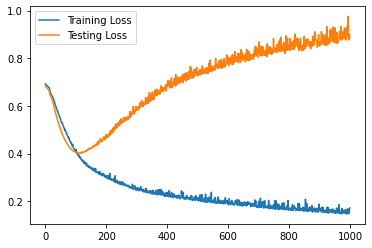

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend(loc='best')
plt.show()